### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

sns.set()
register_matplotlib_converters()

#### Check DIC in the surface layer

In [2]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
dic_df = ds['B_C_DIC'].to_dataframe()
dic_surface = dic_df.groupby('z').get_group(1.250)
dic = dic_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ds = xr.open_dataset('data/with_dic/equal_means/water.nc')
dic_df = ds['B_C_DIC'].to_dataframe()
dic_surface = dic_df.groupby('z').get_group(1.250)
dic_with_flux = dic_surface.loc['2011-01-01':'2011-12-31']

In [4]:
ds = xr.open_dataset('data/with_dic/means_from_data/water.nc')
dic_df = ds['B_C_DIC'].to_dataframe()
dic_surface = dic_df.groupby('z').get_group(1.250)
dic_with_flux2 = dic_surface.loc['2011-01-01':'2011-12-31']

In [5]:
dic = dic.reset_index(); dic_with_flux = dic_with_flux.reset_index();
dic_with_flux2 = dic_with_flux2.reset_index()

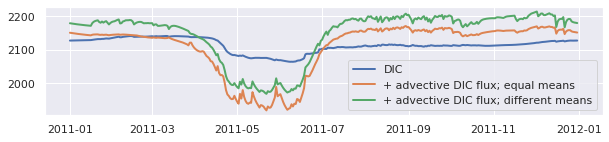

In [6]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dic['time'], dic['B_C_DIC'], linewidth=2, label=r'DIC');
ax.plot(dic_with_flux['time'], dic_with_flux['B_C_DIC'], linewidth=2, label=r'+ advective DIC flux; equal means');
ax.plot(dic_with_flux2['time'], dic_with_flux2['B_C_DIC'], linewidth=2, label=r'+ advective DIC flux; different means');
ax.legend(loc='best');

In [7]:
dic['B_C_DIC'].values.mean()

2113.592

In [10]:
dic_with_flux2['B_C_DIC'].values.mean()

2146.5896

#### Check surface fluxes of CO$_2$

In [12]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_base = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [13]:
ds = xr.open_dataset('data/with_dic/equal_means/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_eq = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [14]:
ds = xr.open_dataset('data/with_dic/means_from_data/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_diff = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [15]:
ds = xr.open_dataset('data/with_alk_dic/means_from_data/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_diff_alk = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [16]:
dicflux_base = dicflux_base.reset_index()
dicflux_eq = dicflux_eq.reset_index()
dicflux_diff = dicflux_diff.reset_index()
dicflux_diff_alk = dicflux_diff_alk.reset_index()

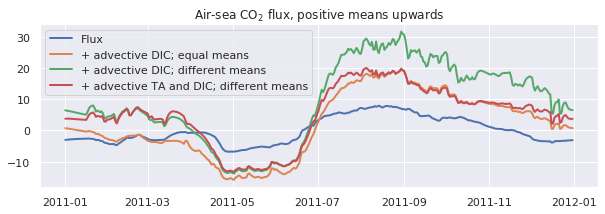

In [17]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dicflux_base['time'], dicflux_base['B_C_DIC   _flux'], linewidth=2, label=r'Flux');
ax.plot(dicflux_eq['time'], dicflux_eq['B_C_DIC   _flux'], linewidth=2, label=r'+ advective DIC; equal means');
ax.plot(dicflux_diff['time'], dicflux_diff['B_C_DIC   _flux'], linewidth=2, label=r'+ advective DIC; different means');
ax.plot(dicflux_diff_alk['time'], dicflux_diff_alk['B_C_DIC   _flux'], linewidth=2, label=r'+ advective TA and DIC; different means');
plt.title('Air-sea CO$_2$ flux, positive means upwards');
ax.legend(loc='best');

In [18]:
dicflux_base['B_C_DIC   _flux'].values.mean()

-0.017884973

In [19]:
dicflux_diff_alk['B_C_DIC   _flux'].values.mean()

4.967582